In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1) Nettoyer l'ensemble de données et mettre à jour le fichier CSV « A_data.csv ».

In [26]:
df=pd.read_csv('Dataset_Automobile - A_data.csv')
df.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


In [27]:
df = df.drop('engine-type', axis=1)

df = df.drop_duplicates()

df.dropna(inplace=True)

In [28]:
df.head()

,index,company,body-style,wheel-base,length,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,five,115,18,17450.0


In [29]:
df.to_csv('A_data.csv', index=False)

## 2) Afficher le nom et le prix de l'entreprise qui dispose de la voiture la plus chère.

In [30]:
indice_v_p_chere = df['price'].idxmax()

entreprise = df.loc[indice_v_p_chere, 'company']
prix_v_p_chere = df.loc[indice_v_p_chere, 'price']

print('entreprise qui dispose de la voiture la plus chère est',entreprise,"avec un prix de",prix_v_p_chere)

entreprise qui dispose de la voiture la plus chère est mercedes-benz avec un prix de 45400.0


## 3) Afficher toutes les données des voitures de la marque Toyota.

In [31]:
toyota = df[df['company'] == 'toyota']
toyota

,index,company,body-style,wheel-base,length,num-of-cylinders,horsepower,average-mileage,price
48,66,toyota,hatchback,95.7,158.7,four,62,35,5348.0
49,67,toyota,hatchback,95.7,158.7,four,62,31,6338.0
50,68,toyota,hatchback,95.7,158.7,four,62,31,6488.0
51,69,toyota,wagon,95.7,169.7,four,62,31,6918.0
52,70,toyota,wagon,95.7,169.7,four,62,27,7898.0
53,71,toyota,wagon,95.7,169.7,four,62,27,8778.0
54,79,toyota,wagon,104.5,187.8,six,156,19,15750.0


## 4) Compter le nombre total des voitures par entreprise.

In [32]:
ntve = df['company'].value_counts()
ntve

company
toyota           7
bmw              6
mazda            5
nissan           5
audi             4
mercedes-benz    4
mitsubishi       4
volkswagen       4
alfa-romero      3
chevrolet        3
honda            3
jaguar           3
dodge            2
porsche          2
volvo            2
isuzu            1
Name: count, dtype: int64

## 5) Calculer la moyenne et l’écart type du prix des voitures.

In [33]:
mean = df['price'].mean()
std = df['price'].std()

print("moyenne du prix des voitures : ", mean)
print("écart type du prix des voitures : ", std)

moyenne du prix des voitures :  15387.0
écart type du prix des voitures :  11320.259841416759


## 6) Trouver la voiture de prix luxe de chaque entreprise

In [34]:
indice_v_luxe = df.groupby('company')['price'].idxmax()

v_luxe_par_entreprise = df.loc[indice_v_luxe]

v_luxe_par_entreprise[['company', 'price']]

,company,price
1,alfa-romero,16500.0
6,audi,18920.0
11,bmw,41315.0
15,chevrolet,6575.0
16,dodge,6377.0
19,honda,12945.0
21,isuzu,6785.0
26,jaguar,36000.0
31,mazda,18344.0
35,mercedes-benz,45400.0


## 7) Trouvez la voiture avec le plus grand nombre de cylindres

In [36]:
sortedDf=df
sortedDf.replace({"zero":0,"one":1,"two":2,"three":3,"four":4,"five":5,"six":6,"seven":7,"eight":8,"nine":9,"ten":10,"eleven":11,"twelve":12},inplace=True)
sortedDf.sort_values(by="num-of-cylinders",ascending=False)

,index,company,body-style,wheel-base,length,num-of-cylinders,horsepower,average-mileage,price
26,35,jaguar,sedan,102.0,191.7,12,262,13,36000.0
35,47,mercedes-benz,hardtop,112.0,199.2,8,184,14,45400.0
34,46,mercedes-benz,sedan,120.9,208.1,8,184,14,40960.0
11,14,bmw,sedan,103.5,193.8,6,182,16,41315.0
25,34,jaguar,sedan,113.0,199.6,6,176,15,35550.0
46,62,porsche,convertible,89.5,168.9,6,207,17,37028.0
45,61,porsche,hardtop,89.5,168.9,6,207,17,34028.0
44,57,nissan,sedan,100.4,184.6,6,152,19,13499.0
54,79,toyota,wagon,104.5,187.8,6,156,19,15750.0
12,15,bmw,sedan,110.0,197.0,6,182,15,36880.0


## Trier toutes les voitures par colonne de prix (Tri décroissant)

In [37]:
Tri_décroissant = df.sort_values('price', ascending=False)
Tri_décroissant

,index,company,body-style,wheel-base,length,num-of-cylinders,horsepower,average-mileage,price
35,47,mercedes-benz,hardtop,112.0,199.2,8,184,14,45400.0
11,14,bmw,sedan,103.5,193.8,6,182,16,41315.0
34,46,mercedes-benz,sedan,120.9,208.1,8,184,14,40960.0
46,62,porsche,convertible,89.5,168.9,6,207,17,37028.0
12,15,bmw,sedan,110.0,197.0,6,182,15,36880.0
26,35,jaguar,sedan,102.0,191.7,12,262,13,36000.0
25,34,jaguar,sedan,113.0,199.6,6,176,15,35550.0
45,61,porsche,hardtop,89.5,168.9,6,207,17,34028.0
24,33,jaguar,sedan,113.0,199.6,6,176,15,32250.0
10,13,bmw,sedan,103.5,189.0,6,182,16,30760.0


## Créez un histogramme pour représenter la distribution des prix des voitures

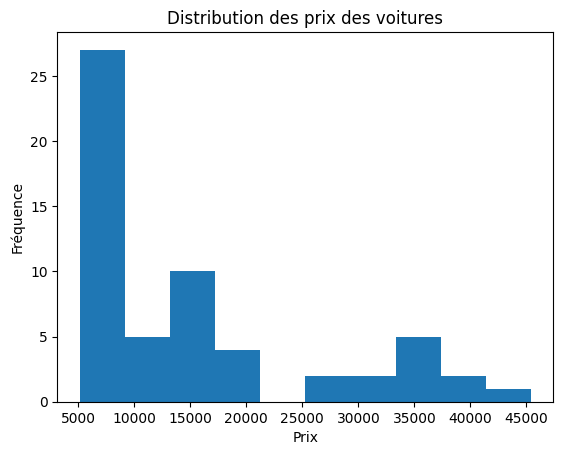

In [38]:
plt.hist(df['price'])

plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.title('Distribution des prix des voitures')

plt.show()

<BarContainer object of 16 artists>

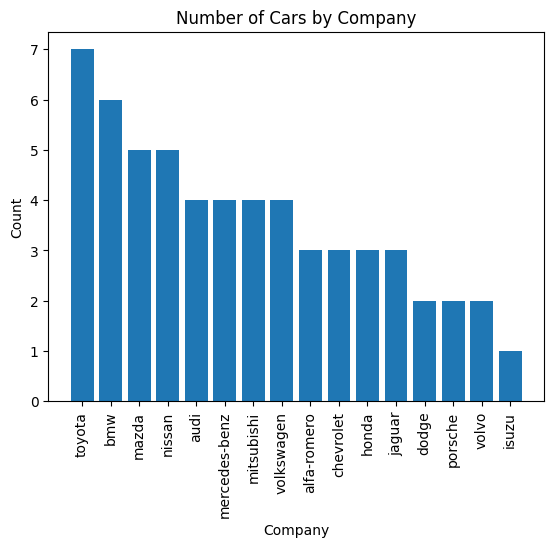

In [39]:
ntve = df['company'].value_counts()
x=ntve.keys()
y=ntve.tolist()
plt.xlabel('Company')
for tick in plt.gca().get_xticklabels():
    tick.set_rotation(90)
plt.ylabel('Count')
plt.title('Number of Cars by Company')
plt.bar(x,y)